In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [15]:
fetch = datasets.fetch_california_housing(as_frame=True)
df = fetch.frame
df.sample(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
9355,9.5551,29.0,5.626866,0.865672,151.0,2.253731,37.96,-122.64,5.00001
19827,2.5141,19.0,5.084746,1.064407,2202.0,3.732203,36.55,-119.40,0.67400
6800,3.2307,25.0,3.757716,1.057870,3518.0,2.714506,34.09,-118.12,1.88400
4886,1.3134,48.0,3.662500,1.100000,1859.0,4.647500,34.02,-118.26,0.96200
8484,3.0139,34.0,5.402632,1.005263,1258.0,3.310526,33.92,-118.30,1.54700
10134,4.1250,32.0,5.543478,1.090580,666.0,2.413043,33.91,-117.91,2.30200
11255,2.5820,28.0,4.617801,1.068063,2304.0,3.015707,33.81,-117.98,1.81800
3216,2.3523,52.0,5.172840,1.057613,624.0,2.567901,36.33,-119.65,0.59100
20477,5.9024,21.0,6.397476,1.004732,1974.0,3.113565,34.28,-118.74,2.21000
9887,1.8287,52.0,4.516908,1.082126,315.0,1.521739,38.30,-122.29,1.46900


In [16]:
#HouseAge
ha_list = df["HouseAge"].values.tolist()
ha_array = df["HouseAge"].values
ha_frame = df["HouseAge"]

#Latutude
lat_list = df["Latitude"].values.tolist()
lat_array = df["Latitude"].values
lat_frame = df["Latitude"]

In [17]:
def calculate_covariance(ha_list, lat_list):
  if len(ha_list) != len(lat_list):
       raise ValueError("The lists must have the same length")

  n = len(ha_list)
  mean_ha = sum(ha_list) / n
  mean_lat = sum(lat_list) / n

  cov = sum((ha_list[i] - mean_ha) * (lat_list[i] - mean_lat) for i in range(n)) / (n-1)

  return cov

calculate_covariance( ha_list, lat_list)



0.3003455075924727

In [18]:
cov_value = ha_frame.cov(lat_frame)
print("HouseAge va Latitude kovariatsiyasi:", cov_value)

HouseAge va Latitude kovariatsiyasi: 0.3003455075924945


In [19]:
def calculate_correlation(ha_list, lat_list):
   if len(ha_list) != len(lat_list):
       raise ValueError("The lists must have the same length")

   n = len(ha_list)
   mean_ha = sum(ha_list) / n
   mean_lat = sum(lat_list) / n

   #calculate coveriance
   cov = sum((ha_list[i] - mean_ha) * (lat_list[i] - mean_lat) for i in range(n)) / (n-1)

   #calculate the standard deviations of ha_list and lat_list
   std_ha = (sum((x - mean_ha) ** 2 for x in ha_list) / (n - 1)) ** 0.5
   std_lat = (sum((x - mean_lat) ** 2 for x in lat_list) / (n - 1)) ** 0.5

   if std_ha == 0 or std_lat == 0:
        raise ValueError("Standard deviations cannot be zero")

   correlation = cov / (std_ha * std_lat)

   return correlation

calculate_correlation(ha_list, lat_list)

0.01117267353060451

In [21]:
df[["HouseAge", "Latitude"]].corr()

,HouseAge,Latitude
HouseAge,1.000000,0.011173
Latitude,0.011173,1.000000


[0.01956981 0.02636506 0.00566125 ... 0.02066854 0.02217442 0.01914368]


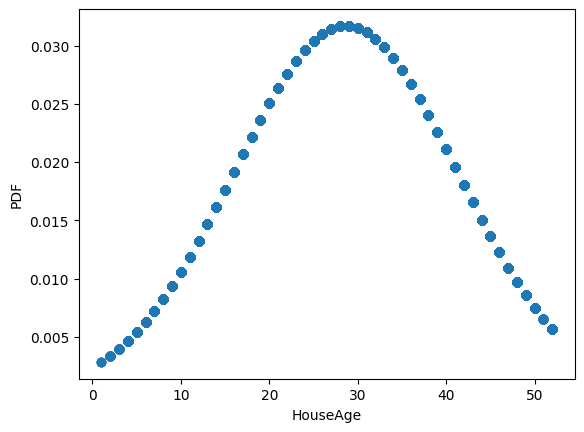

In [28]:
def calculate_pdf_vectorized(data):
  mu = np.mean(data)
  sigma = np.std(data, ddof=1)
  coeff = 1/(sigma*np.sqrt(2*np.pi))

  exponent = np.exp(-(data-mu)**2/(2*sigma**2))

  return coeff*exponent

pdf_values = calculate_pdf_vectorized(ha_list)
print(pdf_values)
plt.scatter(ha_array, pdf_values)
plt.xlabel("HouseAge")
plt.ylabel("PDF")
plt.show()

In [35]:
#min max scaling
def min_max(array):
    min_val = np.min(array)
    max_val = np.max(array)
    scaled_array = (array - min_val) / (max_val - min_val)
    return scaled_array

min_max(ha_array)

array([0.78431373, 0.39215686, 1.        , ..., 0.31372549, 0.33333333,
       0.29411765])

In [59]:
import math

def bivariate_normal_pdf( x, y, ha_list, lat_list):
    if len(ha_list) != len(lat_list):
        raise ValueError("Lists must be same length")

    n = len(ha_list)
    mean_ha = sum(ha_list) / n
    mean_lat = sum(lat_list) / n

    var_ha = sum((xi - mean_ha)**2 for xi in ha_list) / (n-1)
    var_lat = sum((yi - mean_lat)**2 for yi in lat_list) / (n-1)

    cov = sum((ha_list[i] - mean_ha)*(lat_list[i] - mean_lat) for i in range(n)) / (n-1)
    std_ha = math.sqrt(var_ha)
    std_lat = math.sqrt(var_lat)
    rho = cov / (std_ha * std_lat)

    z = ((x - mean_ha)/std_ha)**2 - 2*rho*((x - mean_ha)/std_ha)*((y - mean_lat)/std_lat) + ((y - mean_lat)/std_lat)**2
    denom = 2 * math.pi * std_ha * std_lat * math.sqrt(1 - rho**2)
    exponent = math.exp(-z / (2*(1 - rho**2)))

    return exponent / denom

x = 3
y = 4
print(bivariate_normal_pdf(x, y, ha_list, lat_list))



2.4439304251689203e-51
